In [1]:
!pip install pandas-datareader

     |████████████████████████████████| 109 kB 7.7 MB/s eta 0:00:01


In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime
import pandas_datareader as pdr
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [167]:
start = datetime(2012, 12, 1)
end = datetime(2022, 12, 1)

df_aapl = pdr.get_data_yahoo('AAPL', start, end)

In [168]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004150
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686567
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548315
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807852
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378164


In [169]:
df_aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998


In [170]:
df_aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2518.0,6.213104e+01,4.898945e+01,1.427143e+01,2.694875e+01,4.087500e+01,8.192313e+01,1.829400e+02
Low,2518.0,6.076726e+01,4.773650e+01,1.375357e+01,2.646188e+01,3.997750e+01,8.078375e+01,1.791200e+02
Open,2518.0,6.143649e+01,4.835223e+01,1.385607e+01,2.675375e+01,4.035000e+01,8.115188e+01,1.826300e+02
Close,2518.0,6.147654e+01,4.839191e+01,1.394750e+01,2.670500e+01,4.037125e+01,8.167563e+01,1.820100e+02
Volume,2518.0,1.755352e+08,1.324419e+08,3.519590e+07,9.286760e+07,1.312634e+08,2.085935e+08,1.460852e+09
Adj Close,2518.0,5.967584e+01,4.891822e+01,1.206458e+01,2.449096e+01,3.826690e+01,8.025417e+01,1.809597e+02


In [171]:
#check any na in the data

df_aapl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [172]:
#check if dtype is datetime
df_aapl.index

DatetimeIndex(['2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06',
               '2012-12-07', '2012-12-10', '2012-12-11', '2012-12-12',
               '2012-12-13', '2012-12-14',
               ...
               '2022-11-17', '2022-11-18', '2022-11-21', '2022-11-22',
               '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [173]:
#check Dtype
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2012-12-03 to 2022-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2518 non-null   float64
 1   Low        2518 non-null   float64
 2   Open       2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Volume     2518 non-null   float64
 5   Adj Close  2518 non-null   float64
dtypes: float64(6)
memory usage: 137.7 KB


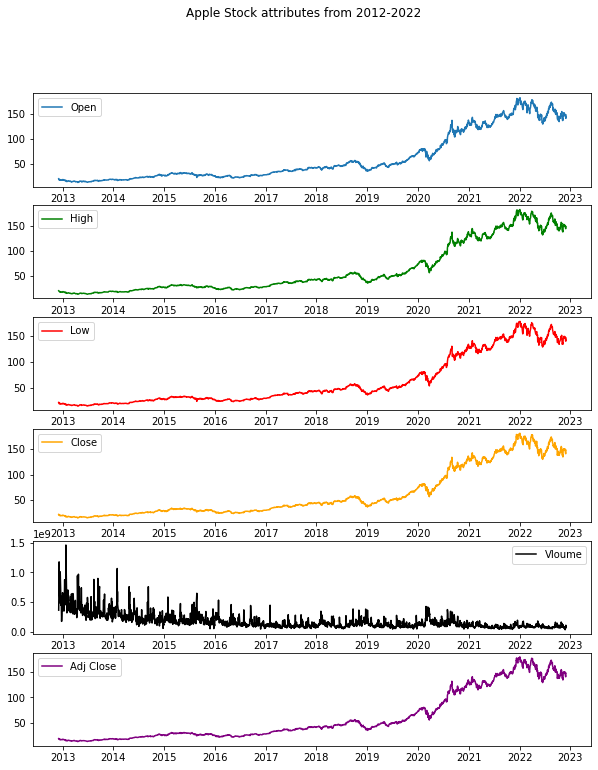

In [174]:
#visualizing the datasets

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(10, 12))
plt.suptitle('Apple Stock attributes from 2012-2022')
ax1.plot(df_aapl['Open'])
ax1.legend(['Open'])
ax2.plot(df_aapl['High'], c='g')
ax2.legend(['High'])
ax3.plot(df_aapl['Low'], c='r')
ax3.legend(['Low'])
ax4.plot(df_aapl['Close'], c='orange')
ax4.legend(['Close'])
ax5.plot(df_aapl['Volume'], c='black')
ax5.legend(['Vloume'])
ax6.plot(df_aapl['Adj Close'], c='purple')
ax6.legend(['Adj Close'])


<AxesSubplot:xlabel='Date'>

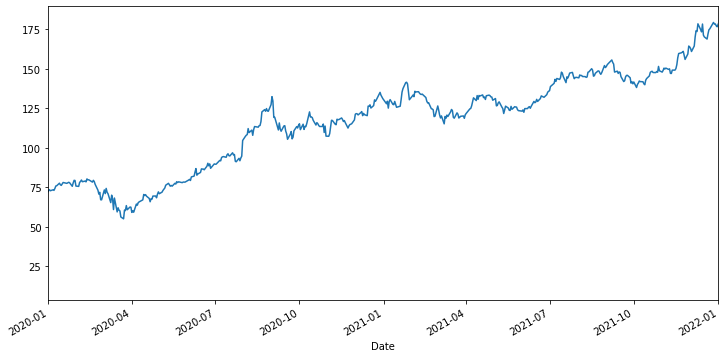

In [175]:
#closer look at the uptrend 

df_aapl['Adj Close'].plot(xlim=['2020-01-01', '2022-'], figsize=(12,6))

<AxesSubplot:>

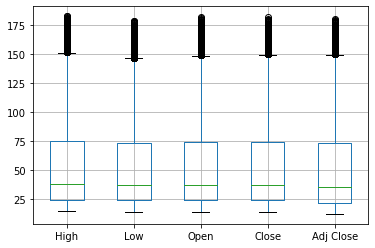

In [33]:
df_aapl.drop('Volume', axis=1).boxplot()

<AxesSubplot:>

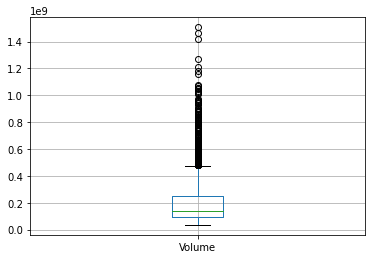

In [34]:
df_aapl[['Volume']].boxplot()

Text(0, 0.5, '% of Return')

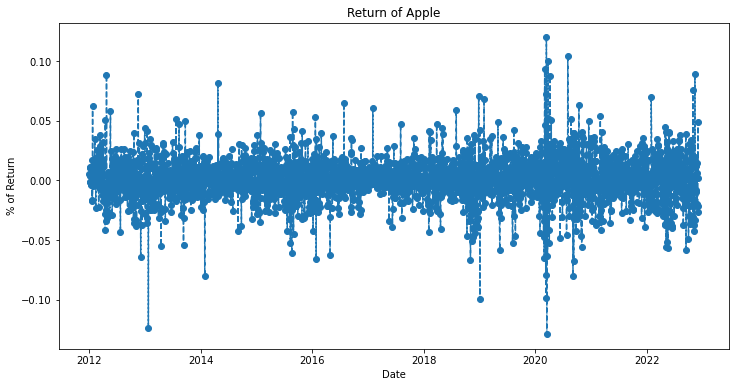

In [89]:
# Return of apple

plt.figure(figsize=(12, 6))
plt.plot(df_aapl['Adj Close'].pct_change(), linestyle='--', marker='o')
plt.title('Return of Apple')
plt.xlabel('Date')
plt.ylabel('% of Return')


Text(0.5, 1.0, 'Average Daily Return of Apple')

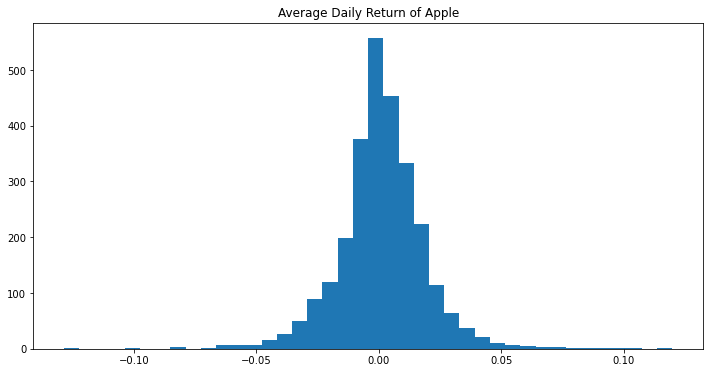

In [93]:
# Daily Return Average of apple

plt.figure(figsize=(12, 6))
plt.hist(df_aapl['Adj Close'].pct_change(), bins=40)
plt.title('Average Daily Return of Apple')


## Time Resampling

In [176]:
df_aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-03,21.235357,20.910713,21.201786,20.935356,3.642800e+08,18.004150
2012-12-04,20.778570,20.433214,20.778570,20.566071,5.570684e+08,17.686567
2012-12-05,20.330357,19.241785,20.318214,19.242500,1.044638e+09,16.548315
2012-12-06,19.761070,18.522499,18.890715,19.544287,1.177212e+09,16.807852
2012-12-07,19.828571,18.928572,19.764286,19.044643,7.870408e+08,16.378164


In [177]:
# annually close mean price

df_aapl.resample(rule='A').mean()['Adj Close']

Date
2012-12-31     16.341458
2013-12-31     14.713781
2014-12-31     20.592401
2015-12-31     27.249668
2016-12-31     24.237950
2017-12-31     35.542361
2018-12-31     45.312168
2019-12-31     50.702359
2020-12-31     93.916394
2021-12-31    139.800847
2022-12-31    155.856111
Freq: A-DEC, Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

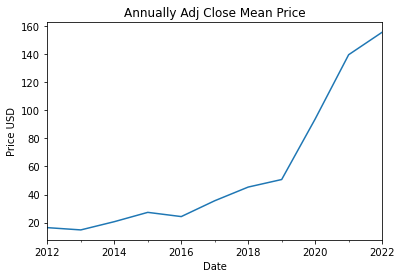

In [178]:
# annually close mean price plot

df_aapl.resample(rule='A').mean()['Adj Close'].plot()
plt.title('Annually Adj Close Mean Price')
plt.xlabel('Date')
plt.ylabel('Price USD')

In [179]:
## annually Adj Close price max

df_aapl.resample(rule='A').max()['Adj Close']

Date
2012-12-31     18.004150
2013-12-31     17.949528
2014-12-31     26.779301
2015-12-31     30.069086
2016-12-31     27.524757
2017-12-31     41.939430
2018-12-31     55.802380
2019-12-31     71.920563
2020-12-31    135.068604
2021-12-31    179.289459
2022-12-31    180.959747
Freq: A-DEC, Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

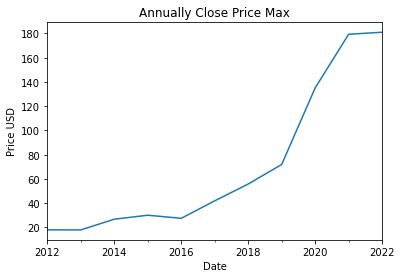

In [182]:
## annually Adj Close price max plot

df_aapl.resample(rule='A').max()['Adj Close'].plot()
plt.title('Annually Close Price Max')
plt.xlabel('Date')
plt.ylabel('Price USD')

In [181]:
# annually Adj CLose price min

df_aapl.resample(rule='A').min()['Adj Close']

Date
2012-12-31     15.651472
2013-12-31     12.064585
2014-12-31     15.735782
2015-12-31     23.500523
2016-12-31     20.914917
2017-12-31     27.144339
2018-12-31     35.429180
2019-12-31     34.309586
2020-12-31     55.082981
2021-12-31    115.151558
2022-12-31    129.664490
Freq: A-DEC, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

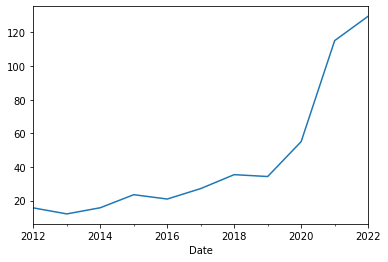

In [180]:
# annually Adj Close price min

df_aapl.resample(rule='A').min()['Adj Close'].plot()

In [48]:
#Date of the highest close

df_aapl['Close'].idxmax()

Timestamp('2022-01-03 00:00:00')

In [51]:
# Price of higest close

df_aapl['Close'].max()

182.00999450683594

In [52]:
#Date of the lowest close

df_aapl['Close'].idxmin()

Timestamp('2013-04-19 00:00:00')

In [53]:
#Price of the lowest close

df_aapl['Close'].min()

13.947500228881836

In [59]:
#simple moving average
df_aapl['Close:5 days rolling'] = df_aapl['Close'].rolling(window=5).mean()
df_aapl['Close:10 days rolling'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['Close:30 days rolling'] = df_aapl['Close'].rolling(window=30).mean()
df_aapl['Close:60 days rolling'] = df_aapl['Close'].rolling(window=60).mean()
df_aapl['Close:90 days rolling'] = df_aapl['Close'].rolling(window=90).mean()
df_aapl['Close:365 days rolling'] = df_aapl['Close'].rolling(window=365).mean()

Text(0, 0.5, 'Date')

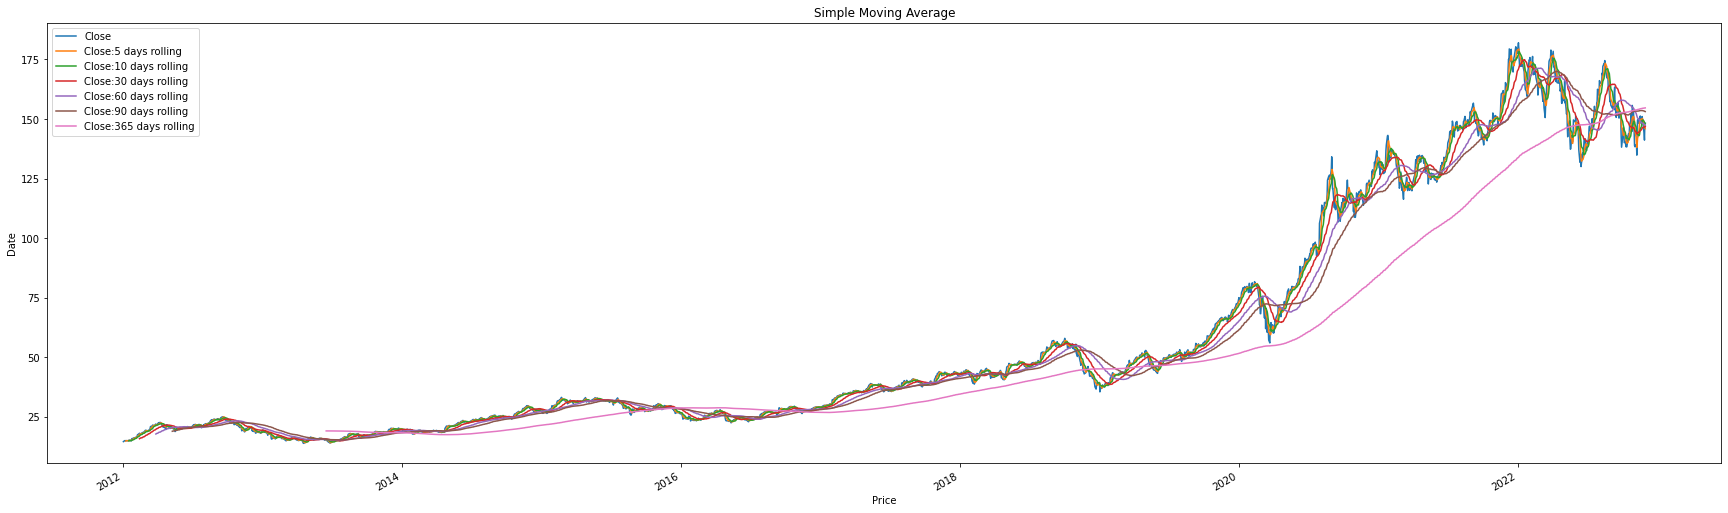

In [67]:
df_aapl[['Close', 'Close:5 days rolling', 'Close:10 days rolling', 'Close:30 days rolling', 'Close:60 days rolling', 'Close:90 days rolling', 'Close:365 days rolling']].plot(figsize=(30, 9))
plt.title('Simple Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')

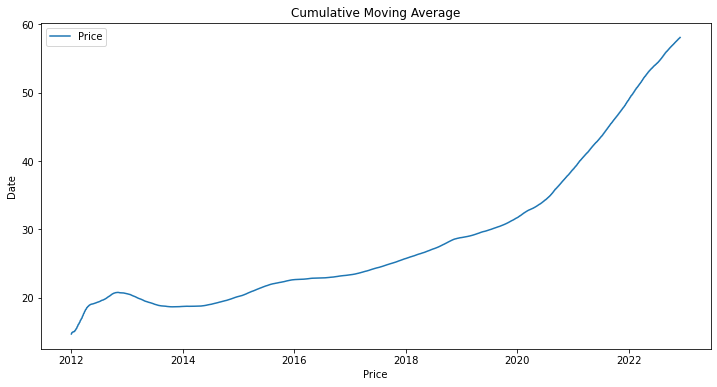

In [101]:
# Cumulative moving average
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Close'].expanding().mean())
plt.title('Cumulative Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')
plt.legend(['Price'])

df_aapl['Close:5 days rolling'] = df_aapl['Close'].rolling(window=5).mean()
df_aapl['Close:10 days rolling'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['Close:30 days rolling'] = df_aapl['Close'].rolling(window=30).mean()
df_aapl['Close:60 days rolling'] = df_aapl['Close'].rolling(window=60).mean()
df_aapl['Close:90 days rolling'] = df_aapl['Close'].rolling(window=90).mean()
df_aapl['Close:365 days rolling'] = df_aapl['Close'].rolling(window=365).mean()

In [96]:
# Exponential moving average
df_aapl['EMA_5days'] = df_aapl['Close'].ewm(span=5).mean()
df_aapl['EMA_10days'] = df_aapl['Close'].ewm(span=10).mean()
df_aapl['EMA_30days'] = df_aapl['Close'].ewm(span=30).mean()
df_aapl['EMA_60days'] = df_aapl['Close'].ewm(span=60).mean()
df_aapl['EMA_90days'] = df_aapl['Close'].ewm(span=90).mean()
df_aapl['EMA_365days'] = df_aapl['Close'].ewm(span=365).mean()


Text(0, 0.5, 'Date')

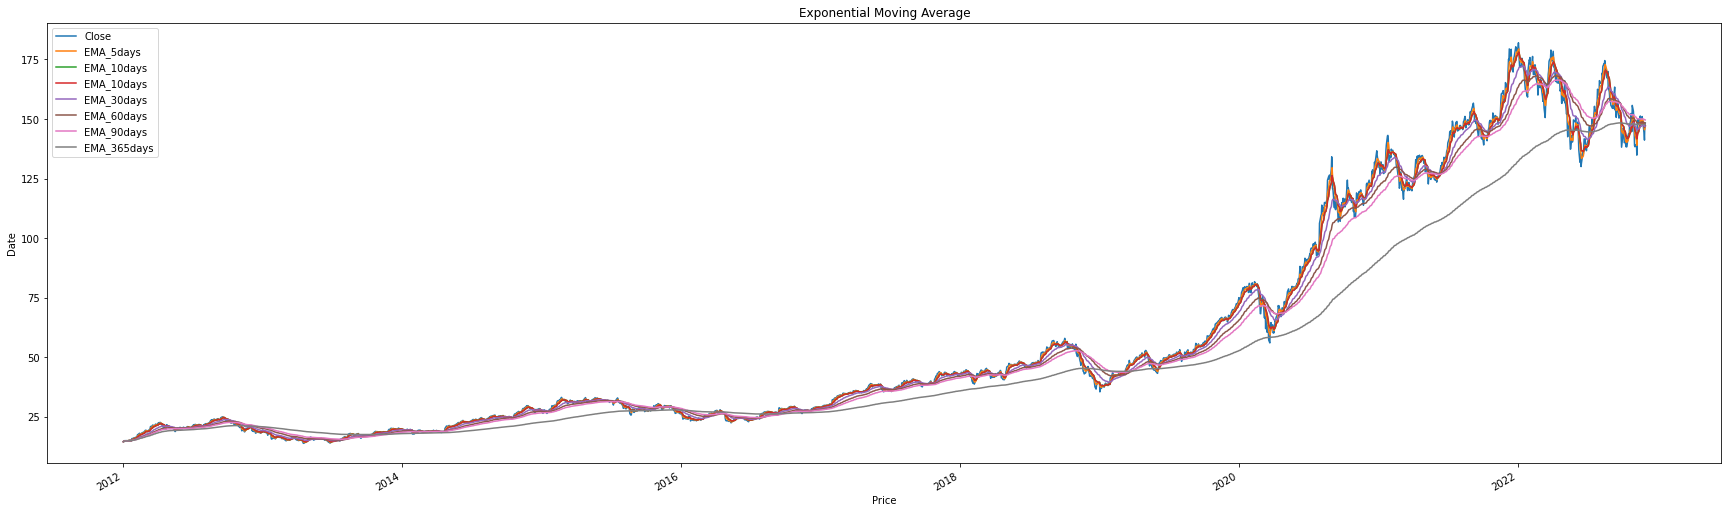

In [97]:
df_aapl[['Close', 'EMA_5days', 'EMA_10days', 'EMA_10days', 'EMA_30days', 'EMA_60days', 'EMA_90days', 'EMA_365days']].plot(figsize=(30, 9))
plt.title('Exponential Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')

## ARIMA

ARIMA (p, d, q):
<br>
p: the order of the AR term (pacf)
<br>
d: the number of differencing required to make the time series stationary (ndiffs)
<br>
q: the order of the MA term (acf)

In [104]:
def adf_test(series):
    result = adfuller(series)
    print('Augmented Dickey-Fuller Test: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
    else:
        print('Weak evidance against the null hypothesis')

In [183]:
adf_test(df_aapl['Adj Close'])

Augmented Dickey-Fuller Test: 0.10886165728388736
p-value: 0.9666609383751263
Weak evidance against the null hypothesis


In [184]:
# Differencing with shift to compare the time series with a past of itself

df_aapl['Adj First Difference'] = df_aapl['Adj Close'] - df_aapl['Adj Close'].shift(1)

In [185]:
df_aapl['Adj First Difference']

Date
2012-12-03         NaN
2012-12-04   -0.317583
2012-12-05   -1.138252
2012-12-06    0.259537
2012-12-07   -0.429688
                ...   
2022-11-25   -2.960007
2022-11-28   -3.889999
2022-11-29   -3.050003
2022-11-30    6.860001
2022-12-01    0.279999
Name: Adj First Difference, Length: 2518, dtype: float64

In [186]:
adf_test(df_aapl['Adj First Difference'].dropna())

Augmented Dickey-Fuller Test: -10.531302902052884
p-value: 9.136897524057488e-19
Strong evidence against the null hypothesis


reject the null hypothesis and no unit root and is stationary

In [192]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [212]:
n = int(len(df_aapl)*0.9)
train = df_aapl[:n]
test = df_aapl[n:]
print(train.shape, test.shape)

(2266, 7) (252, 7)


In [236]:
model_auto = auto_arima(df_aapl['Adj Close'])
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4686.277
Date:                Tue, 13 Dec 2022   AIC                           9380.555
Time:                        13:00:57   BIC                           9403.878
Sample:                             0   HQIC                          9389.019
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0323      0.020      1.639      0.101      -0.006       0.071
ar.L1          0.3755      0.121      3.115      0.002       0.139       0.612
ma.L1         -0.4416      0.118     -3.745      0.000      -0.673      -0.211
sigma2         2.4249      0.028     85.550      0.000       2.369       2.480
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10515.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              54.70   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
from statsmodels.tsa.arima.model import ARIMA

In [237]:
model = ARIMA(train['Adj Close'], order=(1, 1 , 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3578.496
Date:                Tue, 13 Dec 2022   AIC                           7162.991
Time:                        13:01:09   BIC                           7180.167
Sample:                             0   HQIC                          7169.258
                               - 2266                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4152      0.089     -4.675      0.000      -0.589      -0.241
ma.L1          0.3290      0.092      3.561      0.000       0.148       0.510
sigma2         1.3797      0.015     94.911      0.000       1.351       1.408
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             18718.06
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              31.97   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
start = len(train)
end = len(train) + len(test) -1
pred = model_fit.predict(start=start, end=end, typ='levels')
pred.index = df_aapl.index[start:end+1]
print(pred)

Date
2021-12-02    163.959358
2021-12-03    163.901180
2021-12-06    163.925334
2021-12-07    163.915306
2021-12-08    163.919470
                 ...    
2022-11-25    163.918248
2022-11-28    163.918248
2022-11-29    163.918248
2022-11-30    163.918248
2022-12-01    163.918248
Name: predicted_mean, Length: 252, dtype: float64


<AxesSubplot:xlabel='Date'>

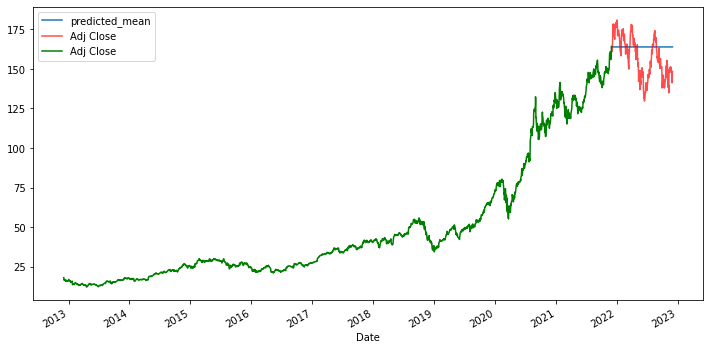

In [243]:
plt.figure(figsize=(12,6))
pred.plot(legend=True, alpha=1)
test['Adj Close'].plot(legend=True, c='r', alpha=0.7)
train['Adj Close'].plot(legend=True, c='g')

In [248]:
rmse = math.sqrt(mean_squared_error(pred, test['Adj Close']))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 14.279798847387008.
